<a href="https://colab.research.google.com/github/VishalPrem1994/AIGenPlayGround/blob/main/SD_Img2Img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install openai numpy opencv-python accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers diffusers omegaconf requests

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests
import torch
from PIL import Image
from io import BytesIO
import torch
from torch import autocast
from diffusers import StableDiffusionImg2ImgPipeline

model_path = "/content/drive/MyDrive/stable_diffusion_weights/RevAnim"
torch.cuda.empty_cache()

device = "cuda"
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_path, safety_checker=None, torch_dtype=torch.float16)
pipe = pipe.to(device)

  0%|          | 0/30 [00:00<?, ?it/s]

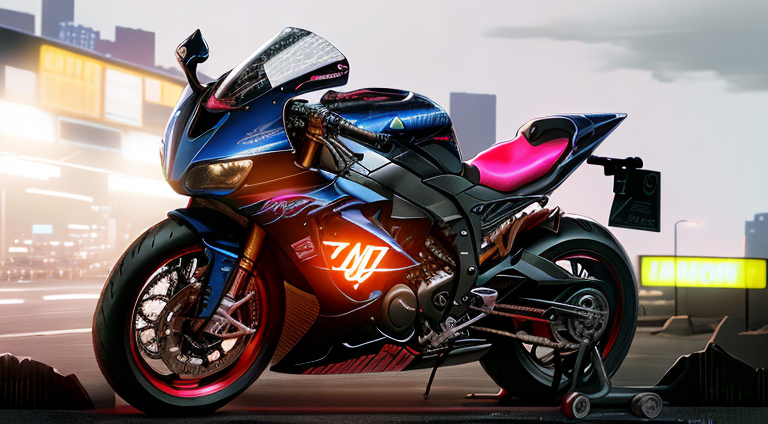

In [67]:
g_cuda = torch.Generator(device='cuda')
seed = 4248775099 #@param {type:"number"}
g_cuda.manual_seed(seed)

url = "https://images.moneycontrol.com/static-mcnews/2020/10/Aprilia-RS660-770x433.jpg?impolicy=website&width=770&height=431" #@param {type:"string"}
prompt = "realistic, sports bike, neon lighting, highly detailed, intricate, natural lighting, in a city" #@param {type:"string"}
negative_prompt = "(worst quality:1.4), (low quality:1.4), child, deformed, deformed face, bad hands, bad fingers, bad hands, (3d, render, cgi, doll, painting:1.4), long body, blurry, duplicate, cloned, duplicate body parts, disfigured, extra limbs, fused fingers, extra fingers, twisted, malformed hands, mutated hands and fingers, conjoined, missing limbs, bad anatomy, bad proportions, logo, signature, text, words, lowres, boring, mutated, artifacts, gross, ugly, stretch, smooth skin texture" #@param {type:"string"}
num_samples = 1 #@param {type:"number"}
guidance_scale = 8 #@param {type:"number"}
strength = 0.6 #@param {type:"number"}
num_inference_steps = 50


response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((770,431))

with autocast("cuda"), torch.inference_mode():
  images = pipe(
      prompt=prompt,
      image=init_image,
      strength=strength,
      guidance_scale=guidance_scale,
      num_images_per_prompt = num_samples,
      num_inference_steps = num_inference_steps,
      generator=g_cuda
      ).images

for img in images:
    display(img)

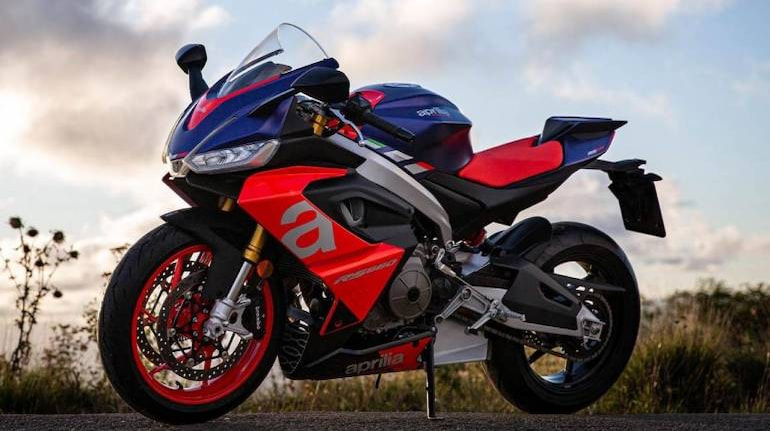

In [68]:
display(init_image)